# Identifying Entities in Healthcare Data

##Workspace set up: Import and Install useful packages.

In [1]:
!pip install pycrf
!pip install sklearn-crfsuite
!pip install scikit-learn==0.21.3

import pandas as pd
import numpy as np
import spacy
import sklearn_crfsuite
from sklearn_crfsuite import metrics
import re

model = spacy.load("en_core_web_sm")

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\91999\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\91999\\AppData\\Local\\Temp\\pip-install-x1is5hkm\\scikit-learn\\setup.py'"'"'; __file__='"'"'C:\\Users\\91999\\AppData\\Local\\Temp\\pip-install-x1is5hkm\\scikit-learn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\91999\AppData\Local\Temp\pip-wheel-_jofc_f4'
       cwd: C:\Users\91999\AppData\Local\Temp\pip-install-x1is5hkm\scikit-learn\
  Complete output (33 lines):
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\91999\AppData\Local\Temp\pip-install-x1is5hkm\scikit-learn\se

  Using cached scikit-learn-0.21.3.tar.gz (12.2 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\91999\anaconda3\lib\site-packages\scikit_learn-0.22.dist-info\
   from C:\Users\91999\anaconda3\Lib\site-packages\~cikit_learn-0.22.dist-info
  Moving to c:\users\91999\anaconda3\lib\site-packages\sklearn\
   from C:\Users\91999\anaconda3\Lib\site-packages\~~learn


##Data Preprocessing

The dataset provided is in the form of one word per line. Let's understand the format of data below:
- Suppose there are *x* words in a sentence, then there will be *x* continuous lines with one word in each line. 
- Further, the two sentences are separated by empty lines. The labels for the data follow the same format.

**We need to pre-process the data to recover the complete sentences and their labels.**


### Construct the proper sentences from individual words and print the 5 sentences.

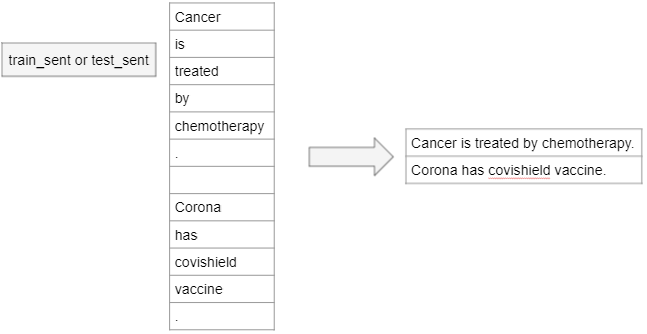

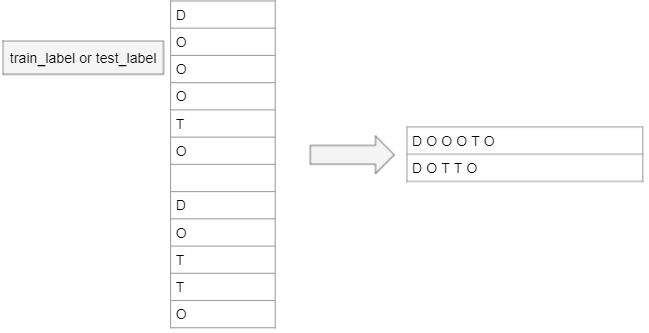

In [2]:
# Importing the Train and Test Set
with open('train_sent', 'r') as train_sent_file:
 train_sentences = train_sent_file.read()

with open('train_label', 'r') as train_labels_file:
  train_labels = train_labels_file.read()

with open('test_sent', 'r') as test_sent_file:
  test_sentences = test_sent_file.read()

with open('test_label', 'r') as test_labels_file:
  test_labels = test_labels_file.read()

#### Preprocessing the Sentences for Train and Test set

In [3]:
x_train_sent = train_sentences.split('\n')
x2_train_sent = ' '.join(x_train_sent)

In [4]:
final_train_sent = re.split(' \s+', x2_train_sent)
final_train_sent.remove("")

In [5]:
# Printing 5 sentence in the train set
print(final_train_sent[0])
print('-' * 100)
print(final_train_sent[1])
print('-' * 100)
print(final_train_sent[2])
print('-' * 100)
print(final_train_sent[3])
print('-' * 100)
print(final_train_sent[4])

All live births > or = 23 weeks at the University of Vermont in 1995 ( n = 2395 ) were retrospectively analyzed for delivery route , indication for cesarean , gestational age , parity , and practice group ( to reflect risk status )
----------------------------------------------------------------------------------------------------
The total cesarean rate was 14.4 % ( 344 of 2395 ) , and the primary rate was 11.4 % ( 244 of 2144 )
----------------------------------------------------------------------------------------------------
Abnormal presentation was the most common indication ( 25.6 % , 88 of 344 )
----------------------------------------------------------------------------------------------------
The `` corrected '' cesarean rate ( maternal-fetal medicine and transported patients excluded ) was 12.4 % ( 273 of 2194 ) , and the `` corrected '' primary rate was 9.6 % ( 190 of 1975 )
----------------------------------------------------------------------------------------------------

In [6]:
x_test_sent = test_sentences.split('\n')
x2_test_sent = ' '.join(x_test_sent)

In [7]:
final_test_sent = re.split(' \s+', x2_test_sent)
final_test_sent.remove("")

In [8]:
# Printing 5 sentence in the test set
print(final_test_sent[0])
print('-' * 100)
print(final_test_sent[1])
print('-' * 100)
print(final_test_sent[2])
print('-' * 100)
print(final_test_sent[3])
print('-' * 100)
print(final_test_sent[4])

Furthermore , when all deliveries were analyzed , regardless of risk status but limited to gestational age > or = 36 weeks , the rates did not change ( 12.6 % , 280 of 2214 ; primary 9.2 % , 183 of 1994 )
----------------------------------------------------------------------------------------------------
As the ambient temperature increases , there is an increase in insensible fluid loss and the potential for dehydration
----------------------------------------------------------------------------------------------------
The daily high temperature ranged from 71 to 104 degrees F and AFI values ranged from 1.7 to 24.7 cm during the study period
----------------------------------------------------------------------------------------------------
There was a significant correlation between the 2- , 3- , and 4-day mean temperature and AFI , with the 4-day mean being the most significant ( r = 0.31 , p & # 60 ; 0.001 )
--------------------------------------------------------------------------

#### Preprocessing the Labels for Train and Test set

In [9]:
x_train_labels = train_labels.split('\n')
x2_train_labels = ' '.join(x_train_labels) 

In [10]:
final_train_labels = re.split(' \s+', x2_train_labels)
final_train_labels.remove("")

In [11]:
# Printing 5 labels in the train set
print(final_train_labels[0])
print('-' * 100)
print(final_train_labels[1])
print('-' * 100)
print(final_train_labels[2])
print('-' * 100)
print(final_train_labels[3])
print('-' * 100)
print(final_train_labels[4])

O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
----------------------------------------------------------------------------------------------------
O O O O O O O O O O O O O O O O O O O O O O O O O
----------------------------------------------------------------------------------------------------
O O O O O O O O O O O O O O O
----------------------------------------------------------------------------------------------------
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
----------------------------------------------------------------------------------------------------
O O O O O O O O O O O O O O O O O O O O O O


In [12]:
x_test_labels = test_labels.split('\n')
x2_test_labels = ' '.join(x_test_labels)

In [13]:
final_test_labels = re.split(' \s+', x2_test_labels)
final_test_labels.remove("")

In [14]:
# Printing 5 labels in the test set
print(final_test_labels[0])
print('-' * 100)
print(final_test_labels[1])
print('-' * 100)
print(final_test_labels[2])
print('-' * 100)
print(final_test_labels[3])
print('-' * 100)
print(final_test_labels[4])

O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
----------------------------------------------------------------------------------------------------
O O O O O O O O O O O O O O O O O O O
----------------------------------------------------------------------------------------------------
O O O O O O O O O O O O O O O O O O O O O O O O
----------------------------------------------------------------------------------------------------
O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O
----------------------------------------------------------------------------------------------------
O O O O O O O O O O O


In [15]:
# Printing a Train sentence with label
print(final_train_sent[15])
print(final_train_labels[15])

All patients were managed by an intensified protocol , including stringent glycemic control
O O O O O O O O O O O T T


In [16]:
# Printing a Test sentence with label
print(final_test_sent[20])
print(final_test_labels[20])

Sequelae include severe developmental delay and asymmetric double hemiplegia
O O O O O O O O D


### Count the number of sentences in the processed train and test dataset 

In [17]:
len(final_train_sent)

2599

In [18]:
len(final_test_sent)

1056

### Count the number of lines of labels in the processed train and test dataset.

In [19]:
len(final_train_labels)

2599

In [20]:
len(final_test_labels)

1056

##Concept Identification

We will first explore what are the various concepts present in the dataset. For this, we will use PoS Tagging. 



### Extract those tokens which have NOUN or PROPN as their PoS tag and find their frequency

In [21]:
# Using Spacy model for POS tagging on the train and test dataset
review1 = model(x2_train_sent)
review2 = model(x2_test_sent)

In [22]:
# POS on training
pos = []
text = []
for tok in review1:
    pos.append(tok.pos_)
    text.append(tok.text)

In [23]:
# POS on testing
pos2 = []
text2 = []
for tok in review2:
    pos2.append(tok.pos_)
    text2.append(tok.text)

In [24]:
pos_train = pd.DataFrame({'Word':text,'POS':pos})
pos_train.head(5)

,Word,POS
0,All,DET
1,live,ADJ
2,births,NOUN
3,>,X
4,or,CCONJ


In [25]:
pos_train.shape

(50923, 2)

In [26]:
pos_test = pd.DataFrame({'Word':text2,'POS':pos2})
pos_test.head(5)

,Word,POS
0,Furthermore,ADV
1,",",PUNCT
2,when,ADV
3,all,DET
4,deliveries,NOUN


In [27]:
pos_test.shape

(20639, 2)

In [28]:
pos_full = pos_train.append(pos_test)
pos_full.head(5)

,Word,POS
0,All,DET
1,live,ADJ
2,births,NOUN
3,>,X
4,or,CCONJ


In [29]:
pos_full.shape

(71562, 2)

In [30]:
df = pos_full.loc[pos_full['POS'].isin(['NOUN','PROPN'])]
df.head(10)

,Word,POS
2,births,NOUN
7,weeks,NOUN
10,University,PROPN
12,Vermont,PROPN
24,delivery,NOUN
25,route,NOUN
27,indication,NOUN
32,age,NOUN
34,parity,NOUN
37,practice,NOUN


In [31]:
df.shape

(24356, 2)

In [32]:
# Frequency of Noun and Proper Noun POS tags in the entire dataset
print(df['POS'].value_counts())
print('Total number of Noun and Proper Noun : ' , len(df['POS']))

NOUN     20096
PROPN     4260
Name: POS, dtype: int64
Total number of Noun and Proper Noun :  24356


### Print the top 25 most common tokens with NOUN or PROPN PoS tags

In [33]:
# 25 most common token with Noun or PROPN tags in the entire data set
df.value_counts().head(25)

Word          POS  
patients      NOUN     492
treatment     NOUN     281
%             NOUN     246
cancer        NOUN     200
therapy       NOUN     174
study         NOUN     146
cell          NOUN     140
disease       NOUN     139
lung          NOUN     116
group         NOUN      91
chemotherapy  NOUN      88
gene          NOUN      88
effects       NOUN      85
results       NOUN      79
women         NOUN      77
TO_SEE        PROPN     75
use           NOUN      73
cases         NOUN      71
risk          NOUN      71
surgery       NOUN      70
analysis      NOUN      70
rate          NOUN      67
survival      NOUN      65
response      NOUN      64
children      NOUN      64
dtype: int64

In [34]:
POS_dict = df.value_counts().to_dict()

## Defining features for CRF





In [35]:
# Let's define the features to get the feature value for one word.
def getFeaturesForOneWord(sentence, pos):
  word = sentence[pos]
  for tok in model(word):
    word_pos_tag=tok.pos_
  features = [
    'word.postag=' + word_pos_tag,  # POS tag of the word
    'word.lower=' + word.lower(), # serves as word id
    'word[-3:]=' + word[-3:],     # last three characters
    'word[-2:]=' + word[-2:],     # last two characters
    'word.isupper=%s' % word.isupper(),  # is the word in all uppercase
    'word.isdigit=%s' % word.isdigit(),  # is the word a number
    'words.startsWithCapital=%s' % word[0].isupper(),  # is the word starting with a capital letter
    'word.istitle=%s' % word.istitle()  # is the word title
  ]

  if(pos > 0):
    prev_word = sentence[pos-1]
    for token in (prev_word):
      prev_word_pos_tag=tok.pos_
    features.extend([
    'prev_word.postag=' + prev_word_pos_tag,
    'prev_word.lower=' + prev_word.lower(), 
    'prev_word.isupper=%s' % prev_word.isupper(),
    'prev_word.isdigit=%s' % prev_word.isdigit(),
    'prev_words.startsWithCapital=%s' % prev_word[0].isupper(),
    'prev_word.istitle=%s' % prev_word.istitle()
  ])
  else:
    features.append('BEG') # feature to track begin of sentence 
  if(pos == len(sentence)-1):
    features.append('END') # feature to track end of sentence
  return features

## Getting the features

### Write a code/function to get the features for a sentence

In [36]:
# Write a code to get features for a sentence.
def getFeaturesForOneSentence(sentence):
  sentence_list = sentence.split()
  return [getFeaturesForOneWord(sentence_list, pos) for pos in range(len(sentence_list))]

### Write a code/function to get the labels of a sentence

In [37]:
# Write a code to get the labels for a sentence.
def getLabelsInListForOneSentence(labels):
  return labels.split()

## Define input and target variables


Correctly computing X and Y sequence matrices for training and test data.
Check that both sentences and labels are processed

In [38]:
example_sentence = final_train_sent[5]
print(example_sentence)

features = getFeaturesForOneSentence(example_sentence)
features[5]

Cesarean rates at tertiary care hospitals should be compared with rates at community hospitals only after correcting for dissimilar patient groups or gestational age


['word.postag=NOUN',
 'word.lower=hospitals',
 'word[-3:]=als',
 'word[-2:]=ls',
 'word.isupper=False',
 'word.isdigit=False',
 'words.startsWithCapital=False',
 'word.istitle=False',
 'prev_word.postag=NOUN',
 'prev_word.lower=care',
 'prev_word.isupper=False',
 'prev_word.isdigit=False',
 'prev_words.startsWithCapital=False',
 'prev_word.istitle=False']

### Define the features' values for each sentence as input variable  for CRF model in test and the train dataset 

In [39]:
X_train = [getFeaturesForOneSentence(sentence) for sentence in final_train_sent]
X_test = [getFeaturesForOneSentence(sentence) for sentence in final_test_sent]

### Define the labels as the target variable for test and the train dataset

In [40]:
Y_train = [getLabelsInListForOneSentence(labels) for labels in final_train_labels]
Y_test = [getLabelsInListForOneSentence(labels) for labels in final_test_labels]

## Build the CRF Model

In [41]:
# Build the CRF model.
crf = sklearn_crfsuite.CRF(max_iterations=100)
crf.fit(X_train, Y_train)

C:\Users\91999\anaconda3\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm=None, all_possible_states=None, all_possible_transitions=None,
    averaging=None, c=None, c1=None, c2=None, calibration_candidates=None,
    calibration_eta=None, calibration_max_trials=None, calibration_rate=None,
    calibration_samples=None, delta=None, epsilon=None, error_sensitive=None,
    gamma=None, keep_tempfiles=None, linesearch=None, max_iterations=100,
    max_linesearch=None, min_freq=None, model_filename=None, num_memories=None,
    pa_type=None, period=None, trainer_cls=None, variance=None, verbose=False)

## Evaluation

### Predict the labels of each of the tokens in each sentence of the test dataset that has been pre processed earlier.

In [42]:
Y_pred = crf.predict(X_test)

### Calculate the f1 score using the actual labels and the predicted labels of the test dataset.

In [43]:
round(metrics.flat_f1_score(Y_test, Y_pred, average='weighted'), 2)

0.91

In [44]:
id = 73
print("Sentence:",final_test_sent[id])
print("Orig Labels:", Y_test[id])
print("Pred Labels:", Y_pred[id])

Sentence: INTERPRETATION : Antichlamydial antibiotics may be useful in therapeutic intervention in addition to standard medication in patients with coronary-artery disease
Orig Labels: ['O', 'O', 'T', 'T', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D']
Pred Labels: ['O', 'O', 'T', 'T', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D']


##Identifying Diseases and Treatments using Custom NER

We now use the CRF model's prediction to prepare a record of diseases identified in the corpus and treatments used for the diseases.



### Create the logic to get all the predicted treatments (T) labels corresponding to each disease (D) label in the test dataset.

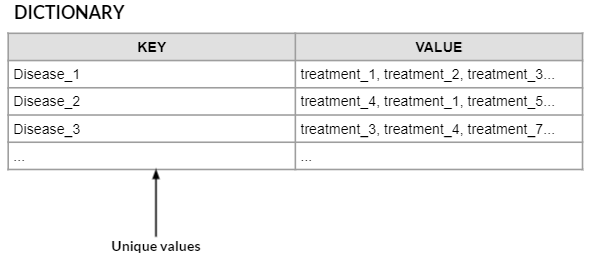

In [45]:
testsentence_df = pd.DataFrame(final_test_sent, columns = ['Sentence'])
predlabels_df = pd.DataFrame(list(zip(Y_pred)),columns =['Predicted_Labels'])

In [46]:
test_full = pd.concat([testsentence_df, predlabels_df], axis = 1)
test_full

,Sentence,Predicted_Labels
0,"Furthermore , when all deliveries were analyze...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,"As the ambient temperature increases , there i...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,The daily high temperature ranged from 71 to 1...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,There was a significant correlation between th...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
4,Fluctuations in ambient temperature are invers...,"[O, O, O, O, O, O, O, O, O, O, O]"
...,...,...
1051,Reduction of vasoreactivity and thrombogenicit...,"[O, O, O, O, O, O, T, T, O, O, O, T, T]"
1052,Effects of ultrasound energy on total peripher...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
1053,High-dose chemotherapy with autologous stem-ce...,"[T, T, O, O, O, O, O, D, D, D]"
1054,`` Tandem '' high-dose chemoradiotherapy with ...,"[T, T, T, T, T, O, O, O, O, O, O, O, O, O, O, ..."


In [47]:
test_full['liststring'] = test_full.Predicted_Labels.apply(lambda x: ' '.join([str(i) for i in x]))
test_full

,Sentence,Predicted_Labels,liststring
0,"Furthermore , when all deliveries were analyze...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O O O O O O O ...
1,"As the ambient temperature increases , there i...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O O O
2,The daily high temperature ranged from 71 to 1...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O O O O O O O O
3,There was a significant correlation between th...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O O O O O O O ...
4,Fluctuations in ambient temperature are invers...,"[O, O, O, O, O, O, O, O, O, O, O]",O O O O O O O O O O O
...,...,...,...
1051,Reduction of vasoreactivity and thrombogenicit...,"[O, O, O, O, O, O, T, T, O, O, O, T, T]",O O O O O O T T O O O T T
1052,Effects of ultrasound energy on total peripher...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",O O O O O O O O O O O O O O O O
1053,High-dose chemotherapy with autologous stem-ce...,"[T, T, O, O, O, O, O, D, D, D]",T T O O O O O D D D
1054,`` Tandem '' high-dose chemoradiotherapy with ...,"[T, T, T, T, T, O, O, O, O, O, O, O, O, O, O, ...",T T T T T O O O O O O O O O O O D D D


In [48]:
subs = 'T'
res = [i for i in test_full['liststring'] if subs in i]

In [49]:
subs = 'D'
res2 = [i for i in res if subs in i]

In [50]:
matches = res2

In [51]:
matches

['O O O O O O O O O O O O O O O O O D D O O O O O T',
 'O O O O O T O O O O O O O O O O O O O O O O O O O O O D D D D D D',
 'O O T T O O O O O O O O O O O O O O D D',
 'O O O O O T T O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O D O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O O T T T O O O O O O O O O O O O O O O O',
 'O O T T O O O O O O O D D O O O',
 'T T O O O O O O O O O O D D D D',
 'O O O O O O O O O O O O O O O O O T T O D D D D',
 'O O O O O O O O O O O O O T O O O O O O D D D',
 'O O O O O O O O O D D D D D O O O O T T T T T T T T O O O',
 'O O O O O O O O O O O O O O O O O O O T T T T O D O O O',
 'O O T T O O O O O O O D D D O O O O O O O T T',
 'O O O O O O D D D O O O O T T T T T T',
 'O O O T O O O O O O O O O O D D D O O O O O O O',
 'O O O O O O O T T T T T T T O O O T T T T T T T T T O O O O O O O D D',
 'T T O D D O O O O O O O',
 'T T T O D D',
 'O O T O D D D',
 'T T T O O O D D D O O O O O O',
 'O 

In [52]:
test_full['new_col'] = (test_full['liststring']
                .str.findall(f"({'|'.join(matches)})")
                .str.join(', ')
                 .replace('', np.nan))

In [53]:
test_full

,Sentence,Predicted_Labels,liststring,new_col
0,"Furthermore , when all deliveries were analyze...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O O O O O O O ...,NaN
1,"As the ambient temperature increases , there i...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O O O,NaN
2,The daily high temperature ranged from 71 to 1...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O O O O O O O O,NaN
3,There was a significant correlation between th...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O O O O O O O ...,NaN
4,Fluctuations in ambient temperature are invers...,"[O, O, O, O, O, O, O, O, O, O, O]",O O O O O O O O O O O,NaN
...,...,...,...,...
1051,Reduction of vasoreactivity and thrombogenicit...,"[O, O, O, O, O, O, T, T, O, O, O, T, T]",O O O O O O T T O O O T T,NaN
1052,Effects of ultrasound energy on total peripher...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]",O O O O O O O O O O O O O O O O,NaN
1053,High-dose chemotherapy with autologous stem-ce...,"[T, T, O, O, O, O, O, D, D, D]",T T O O O O O D D D,T T O O O O O D D D
1054,`` Tandem '' high-dose chemoradiotherapy with ...,"[T, T, T, T, T, O, O, O, O, O, O, O, O, O, O, ...",T T T T T O O O O O O O O O O O D D D,T T T T T O O O O O O O O O O O D D D


In [54]:
test_full_final = test_full[pd.notnull(test_full['new_col'])]

In [55]:
test_full_final

,Sentence,Predicted_Labels,liststring,new_col
46,< TO_SEE > CONTEXT : There is a substantial ri...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O D D O O O O O T,O O O O O O O O O O O O O O O O O D D O O O O O T
71,METHODS : The effect of roxithromycin was asse...,"[O, O, O, O, O, T, O, O, O, O, O, O, O, O, O, ...",O O O O O T O O O O O O O O O O O O O O O O O ...,O O O O O T O O O O O O O O O O O O O O O O O ...
73,INTERPRETATION : Antichlamydial antibiotics ma...,"[O, O, T, T, O, O, O, O, O, O, O, O, O, O, O, ...",O O T T O O O O O O O O O O O O O O D D,O O T T O O O O O O O O O O O O O O D D
155,< TO_SEE > FINDINGS : G-CSF therapy was associ...,"[O, O, O, O, O, T, T, O, O, O, O, O, O, O, O, ...",O O O O O T T O O O O O O O O O O O O O O O O ...,O O O O O T T O O O O O O O O O O O O O O O O ...
157,INTERPRETATION : G-CSF treatment was associate...,"[O, O, T, T, O, O, O, O, O, O, O, D, D, O, O, O]",O O T T O O O O O O O D D O O O,O O T T O O O O O O O D D O O O
...,...,...,...,...
1039,Surgical management of severe secondary perito...,"[T, T, O, D, D, D]",T T O D D D,T T O D D D
1042,Hepatic arterial infusion of chemotherapy afte...,"[T, T, T, T, T, O, O, O, D, D, D, D, D]",T T T T T O O O D D D D D,T T T T T O O O D D D D D
1050,Epoetin : a pharmacoeconomic review of its use...,"[T, O, O, O, O, O, O, O, O, D, D, D, O, O, O, ...",T O O O O O O O O D D D O O O O O O O,T O O O O O O O O D D D O O O O O O O
1053,High-dose chemotherapy with autologous stem-ce...,"[T, T, O, O, O, O, O, D, D, D]",T T O O O O O D D D,T T O O O O O D D D


In [56]:
test_full_final2 = test_full_final.drop(['new_col'], axis=1)

In [57]:
test_full_final2

,Sentence,Predicted_Labels,liststring
46,< TO_SEE > CONTEXT : There is a substantial ri...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",O O O O O O O O O O O O O O O O O D D O O O O O T
71,METHODS : The effect of roxithromycin was asse...,"[O, O, O, O, O, T, O, O, O, O, O, O, O, O, O, ...",O O O O O T O O O O O O O O O O O O O O O O O ...
73,INTERPRETATION : Antichlamydial antibiotics ma...,"[O, O, T, T, O, O, O, O, O, O, O, O, O, O, O, ...",O O T T O O O O O O O O O O O O O O D D
155,< TO_SEE > FINDINGS : G-CSF therapy was associ...,"[O, O, O, O, O, T, T, O, O, O, O, O, O, O, O, ...",O O O O O T T O O O O O O O O O O O O O O O O ...
157,INTERPRETATION : G-CSF treatment was associate...,"[O, O, T, T, O, O, O, O, O, O, O, D, D, O, O, O]",O O T T O O O O O O O D D O O O
...,...,...,...
1039,Surgical management of severe secondary perito...,"[T, T, O, D, D, D]",T T O D D D
1042,Hepatic arterial infusion of chemotherapy afte...,"[T, T, T, T, T, O, O, O, D, D, D, D, D]",T T T T T O O O D D D D D
1050,Epoetin : a pharmacoeconomic review of its use...,"[T, O, O, O, O, O, O, O, O, D, D, D, O, O, O, ...",T O O O O O O O O D D D O O O O O O O
1053,High-dose chemotherapy with autologous stem-ce...,"[T, T, O, O, O, O, O, D, D, D]",T T O O O O O D D D


In [58]:
sentence2_list = test_full_final2.Sentence.tolist()
len(sentence2_list)

122

In [59]:
def convertedsent(lst):
    return ([i for item in lst for i in item.split()])

In [60]:
a1 = convertedsent(sentence2_list)
print(a1)
print(len(a1))

['<', 'TO_SEE', '>', 'CONTEXT', ':', 'There', 'is', 'a', 'substantial', 'risk', 'of', 'a', 'second', 'cancer', 'for', 'persons', 'with', 'hereditary', 'retinoblastoma', ',', 'which', 'is', 'enhanced', 'by', 'radiotherapy', 'METHODS', ':', 'The', 'effect', 'of', 'roxithromycin', 'was', 'assessed', 'in', 'a', 'double-blind', ',', 'randomised', ',', 'prospective', ',', 'multicentre', ',', 'parallel-group', ',', 'placebo-controlled', 'pilot', 'study', 'of', '202', 'patients', 'with', 'unstable', 'angina', 'or', 'non-Q-wave', 'myocardial', 'infarction', 'INTERPRETATION', ':', 'Antichlamydial', 'antibiotics', 'may', 'be', 'useful', 'in', 'therapeutic', 'intervention', 'in', 'addition', 'to', 'standard', 'medication', 'in', 'patients', 'with', 'coronary-artery', 'disease', '<', 'TO_SEE', '>', 'FINDINGS', ':', 'G-CSF', 'therapy', 'was', 'associated', 'with', 'earlier', 'eradication', 'of', 'pathogens', 'from', 'the', 'infected', 'ulcer', '(', 'median', '4', '(', 'range', '2-10', ')', 'vs', '8'

In [61]:
label2_list = test_full_final2.Predicted_Labels.tolist()
len(label2_list)

122

In [62]:
from itertools import chain
b1 = list(chain.from_iterable(label2_list))
print(b1)
print(len(b1))

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D', 'O', 'O', 'O', 'O', 'O', 'T', 'O', 'O', 'O', 'O', 'O', 'T', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D', 'D', 'D', 'D', 'D', 'O', 'O', 'T', 'T', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D', 'O', 'O', 'O', 'O', 'O', 'T', 'T', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'T', 'T', 'T', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'T', 'T', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D', 'O', 'O',

In [63]:
x_test_sent_words = pd.DataFrame(list(zip(a1)),columns =['words'])
x_test_sent_words

,words
0,<
1,TO_SEE
2,>
3,CONTEXT
4,:
...,...
2822,diagnosed
2823,or
2824,responsive
2825,multiple


In [64]:
x_test_labels_words = pd.DataFrame(list(zip(b1)),columns =['predicted_labels'])
x_test_labels_words

,predicted_labels
0,O
1,O
2,O
3,O
4,O
...,...
2822,O
2823,O
2824,D
2825,D


In [65]:
test_full_word_labels = pd.concat([x_test_sent_words, x_test_labels_words], axis = 1)
test_full_word_labels

,words,predicted_labels
0,<,O
1,TO_SEE,O
2,>,O
3,CONTEXT,O
4,:,O
...,...,...
2822,diagnosed,O
2823,or,O
2824,responsive,D
2825,multiple,D


In [66]:
disease = test_full_word_labels.loc[test_full_word_labels['predicted_labels'].str.contains("D")]
disease

,words,predicted_labels
17,hereditary,D
18,retinoblastoma,D
52,unstable,D
53,angina,D
54,or,D
...,...,...
2806,ovarian,D
2807,cancer,D
2824,responsive,D
2825,multiple,D


In [67]:
disease_words = disease['words'].tolist()

In [68]:
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))

In [69]:
unique(disease_words)

["'s" '(' ')' ',' '0' 'B' 'B16' 'C' 'Contemporary' 'Eisenmenger' 'IIB-IVB'
 'PSC' 'Parkinson' 'TNM' 'a' 'abdominal' 'achalasia' 'acoustic' 'acute'
 'adenocarcinoma' 'adhesive' 'advanced' 'and' 'anemia' 'angina'
 'angiogenesis' 'arachnoiditis' 'artery' 'arthropathy' 'as' 'asthma'
 'attributable' 'autoimmune' 'azoospermia' 'benign' 'biliary' 'bladder'
 'brain' 'breast' 'bronchial' 'bronchiectasis' 'cancer' 'carcinoma' 'cell'
 'cellulitis' 'cerebral' 'cholangitis' 'cholestasis' 'chronic' 'cold'
 'colorectal' 'common' 'coronary-artery' 'diabetic' 'disease' 'diseases'
 'disseminated' 'dyskinesia' 'early' 'early-stage' 'effusions' 'embolism'
 'epithelial' 'esophageal' 'extensive' 'failure' 'female' 'foot' 'from'
 'fungoides' 'hairy' 'head' 'hemolytic' 'hemorrhage' 'hepatic' 'hepatitis'
 'hereditary' 'high-grade' 'hormone' 'hyperplasia' 'hypertension'
 'hypospadias' 'hypoxemia' 'i' 'iii' 'iiib' 'in' 'incontinence'
 'infarction' 'infection' 'inflammatory' 'inoperable' 'intraluminal'
 'ischemia

In [70]:
diseases_list = ["'s", 'B16', 'Contemporary', 'Eisenmenger','IIB-IVB', 'PSC', 'Parkinson', 'TNM', 'abdominal',
 'achalasia', 'acute','acoustic', 'adenocarcinoma', 'adhesive', 'advanced', 'anemia', 'angina','angiogenesis',
 'arachnoiditis' ,'artery', 'arthropathy', 'asthma','attributable', 'autoimmune','azoospermia', 'benign', 'biliary',
 'bladder','brain', 'breast','bronchial', 'bronchiectasis', 'cancer', 'carcinoma',  'cellulitis', 'cerebral',
 'cholangitis', 'cholestasis', 'chronic', 'cold', 'colic', 'colorectal' ,'common', 'coronary-artery', 'diabetic',
 'disease','diseases','disseminated', 'dyskinesia', 'early', 'early-stage','effusions', 'embolism', 'epithelial',
 'esophageal', 'extensive', 'failure', 'female', 'foot', 'fungoides', 'hairy', 'head', 'hemolytic', 'hemorrhage',
 'hepatic', 'hepatitis', 'hereditary', 'high-grade', 'hormone', 'hyperplasia', 'hypertension', 'hypospadias',
 'hypoxemia', 'incontinence', 'infarction', 'infection', 'inflammatory', 'inoperable', 'intraluminal', 'ischemia',
 'joint', 'la-nsclc', 'large-bowel', 'leukemia', 'limited', 'limited-stage', 'locally', 'low-grade', 'lung','lymphoma',
 'major', 'malignancies', 'malignant', 'melanoma', 'mesothelioma', 'metastases', 'metastasis', 'metastatic',
 'middle', 'mitomycin-resistant', 'moderately', 'multiple', 'mycosis', 'myeloma', 'myelopathy', 'myocardial', 'neck',
 'neuroma', 'neutropenia', 'node', 'non-Hodgkin', 'non-Q-wave', 'non-hodgkin', 'non-obstructive','non-sclc', 
 'non-small', 'non-small-cell', 'non-small-cell-lung-cancer', 'nsclc', 'occlusion', 'ovarian','pain', 'palsy',
 'partial', 'pathologic', 'peritonitis', 'persistent', 'phaeochromocytoma', 'platinum-pretreated', 'pleural',
 'postvitrectomy', 'preeclampsia', 'primary', 'prostate', 'prostatic', 'proteinuric', 'proximal', 'pulmonary',
 'radiation-induced','rectal', 'refractory', 'renal', 'responsive', 'retinoblastoma', 'rhinovirus',
 'sarcomas','sclc', 'sclerosing', 'sclerosis', 'secondary', 'seizures', 'severe', 'single','skin', 'small',
 'small-cell', 'soft', 'spinal', 'squamous', 'stage', 'stenosis', 'stomach', 'stress', 'such', 'supraclavicular',
 'symptomatic', 'symptoms', 'syndrome', 'tachycardia', 'temporomandibular', 'tissue', 'tumors', 'unresectable',
 'unstable', 'untreated', 'urinary', 'uveal', 'ventricular', 'viremia', 'vitreous', 'xerostomia']
pattern = '|'.join(diseases_list)

In [71]:
test_full_final2['Disease'] = test_full_final2['Sentence'].str.findall(pattern)

In [72]:
test_full_final2 = test_full_final2.drop(['Predicted_Labels', 'liststring'], axis=1)

In [73]:
test_full_final2

,Sentence,Disease
46,< TO_SEE > CONTEXT : There is a substantial ri...,"[cancer, hereditary, retinoblastoma]"
71,METHODS : The effect of roxithromycin was asse...,"[unstable, angina, non-Q-wave, myocardial, inf..."
73,INTERPRETATION : Antichlamydial antibiotics ma...,"[coronary-artery, disease]"
155,< TO_SEE > FINDINGS : G-CSF therapy was associ...,[cellulitis]
157,INTERPRETATION : G-CSF treatment was associate...,"[foot, infection, diabetic]"
...,...,...
1039,Surgical management of severe secondary perito...,"[severe, secondary, peritonitis]"
1042,Hepatic arterial infusion of chemotherapy afte...,"[hepatic, metastases, colorectal, cancer]"
1050,Epoetin : a pharmacoeconomic review of its use...,"[chronic, renal, failure]"
1053,High-dose chemotherapy with autologous stem-ce...,"[epithelial, ovarian, cancer]"


In [74]:
treatment = test_full_word_labels.loc[test_full_word_labels['predicted_labels'].str.contains("T")]
treatment

,words,predicted_labels
24,radiotherapy,T
30,roxithromycin,T
60,Antichlamydial,T
61,antibiotics,T
83,G-CSF,T
...,...,...
2808,``,T
2809,Tandem,T
2810,'',T
2811,high-dose,T


In [75]:
treatment_words = treatment['words'].tolist()

In [76]:
unique(treatment_words)

["''" '(' ')' ',' '125' '5-fluorouracil' 'A' 'Adrenalectomy'
 'Antichlamydial' 'Antiplatelet' 'C' 'CDDP' 'Cholecystectomy'
 'Combination' 'Current' 'Elective' 'Epoetin' 'Fluticasone' 'G-CSF' 'Gene'
 'Guiding' 'Hepatic' 'High-dose' 'Hoffmann' 'Hormone' 'Hyperbaric' 'IFN'
 'Immunotherapy' 'Interferon' 'Intravenous' 'LTG' 'LV' 'La' 'MF59'
 'Macrolide' 'Microelectrode-guided' 'Nerve-sparing' 'Non-steroidal'
 'Peripheral' 'Radiotherapy' 'Ribavirin' 'Roche' 'Roferon-A' 'Ropinirole'
 'Stereotactic' 'Surgical' 'TEFNA' 'TESE' 'Tandem' 'Thrombolytic'
 'Trisomy' 'Tubularized' 'UFT' '``' 'a' 'acetaminophen' 'adjuvant'
 'administration' 'agent' 'alfa-2a' 'alfa-N1' 'alone' 'alpha' 'amifostine'
 'amoxicillin' 'and' 'anti-inflammatory' 'antibiotic' 'antibiotics'
 'antileukemic' 'arterial' 'arthroscopic' 'aspiration' 'assessing' 'beta'
 'biopsy' 'bleomycin' 'block' 'botulinum' 'budesonide' 'buthionine'
 'cancer' 'carboplatin' 'chemo-' 'chemoradiotherapy' 'chemotherapeutic'
 'chemotherapy' 'cholecystect

In [77]:
treatments_list = ['125', '5-fluorouracil', 'Adrenalectomy', 'Antichlamydial', 'Antiplatelet', 'CDDP', 'Cholecystectomy',
 'Combination', 'Current', 'Elective', 'Epoetin' , 'Fluticasone','G-CSF', 'Gene', 'Guiding', 'Hepatic', 'High-dose',
 'Hoffmann', 'Hormone', 'Hyperbaric', 'IFN', 'Immunotherapy', 'Interferon', 'Intravenous', 'LTG', 'LV', 'La' , 'MF59',
 'Macrolide', 'Microelectrode-guided', 'Nerve-sparing', 'Non-steroidal', 'Peripheral', 'Radiotherapy', 'Ribavirin', 'Roche',
 'Roferon-A', 'Ropinirole', 'Stereotactic', 'Surgical', 'TEFNA', 'TESE', 'Tandem', 'Thrombolytic', 'Trisomy', 'Tubularized',
 'UFT', 'acetaminophen', 'adjuvant', 'administration' , 'agent', 'alfa-2a', 'alfa-N1', 'alone', 'alpha', 'amifostine',
 'amoxicillin', 'anti-inflammatory', 'antibiotic', 'antibiotics', 'antileukemic', 'arterial', 'arthroscopic', 'aspiration',
 'assessing', 'beta', 'biopsy', 'bleomycin', 'block', 'botulinum', 'budesonide', 'buthionine', 'carboplatin', 'chemo-',
 'chemoradiotherapy', 'chemotherapeutic','chemotherapy', 'cholecystectomy', 'cisplatin', 'clarithromycin', 'combination',
 'combined-modality', 'conservative', 'consisting', 'containing', 'corticosteroids', 'cranial', 'crude', 'cryotherapy',
 'curative', 'derivative', 'dilation', 'donor', 'dose', 'doxorubicin', 'drugs', 'enoxaparin', 'evaluate', 'extraction',
 'fine', 'first-line', 'glucocorticoid', 'got', 'guidelines', 'hdIVIg', 'hemodynamics', 'heparin','high-dose','hypospadias', 
 'ifosfamide','immunoglobulin', 'incised', 'infusion', 'inhaled', 'injection', 'insemination', 'interferon', 'interstitial',
 'interferon-alpha', 'intrauterine', 'intravenous', 'involving', 'iodine', 'irinotecan', 'irradiation', 'lamotrigine',
 'laparoscopic', 'leucovorin', 'leukocyte', 'lobectomy', 'management', 'mastectomy', 'list', 'metastasectomy','methotrexate',
 'mitomycin', 'monotherapy', 'myotomy', 'needle', 'omeprazole', 'open', 'oral', 'organ', 'oxaliplatin', 'oxygen',
 'paclitaxel', 'pallidotomy', 'paravertebral', 'partial', 'pc', 'pharmacological', 'plate', 'photodynamic', 'planned',
 'platinum', 'platinum-based', 'plus', 'pneumatic', 'posteroventral', 'postoperative', 'potential', 'preparations',
 'program', 'prolongs', 'prophylactic', 'propionate', 'prostatectomy', 'pseudoephedrine', 'pulse', 'rIFN-alpha','radiation',
 'radical', 'radiosurgery', 'radiotherapy', 'recombinant', 'repair', 'replacement', 'resection', 'retinal', 'rhg-csf',
 'right-side', 'roxithromycin', 'sequential', 'several', 'single', 'sperm', 'studies', 'subcutaneous', 'sulfoximine',
 'support', 'surgery', 'surgical', 'systemic', 'testicular', 'therapeutic', 'therapy', 'thermotherapy', 'thoracic',
 'thoracotomy', 'thrombolytic', 'topical', 'toxin', 'transplantation', 'transpupillary', 'treatment', 'uft', 'undergone',
 'vaccine', 'various', 'vats', 'vc', 'versus', 'videothoracoscopic', 'vinorelbine', 'weekly']
pattern2 = '|'.join(treatments_list)

In [78]:
test_full_final2['Treatment'] = test_full_final2['Sentence'].str.findall(pattern2)

In [79]:
test_full_final2

,Sentence,Disease,Treatment
46,< TO_SEE > CONTEXT : There is a substantial ri...,"[cancer, hereditary, retinoblastoma]",[radiotherapy]
71,METHODS : The effect of roxithromycin was asse...,"[unstable, angina, non-Q-wave, myocardial, inf...",[roxithromycin]
73,INTERPRETATION : Antichlamydial antibiotics ma...,"[coronary-artery, disease]","[Antichlamydial, antibiotic, therapeutic]"
155,< TO_SEE > FINDINGS : G-CSF therapy was associ...,[cellulitis],"[G-CSF, therapy, intravenous, antibiotic, trea..."
157,INTERPRETATION : G-CSF treatment was associate...,"[foot, infection, diabetic]","[G-CSF, treatment]"
...,...,...,...
1039,Surgical management of severe secondary perito...,"[severe, secondary, peritonitis]","[Surgical, management]"
1042,Hepatic arterial infusion of chemotherapy afte...,"[hepatic, metastases, colorectal, cancer]","[Hepatic, arterial, infusion, chemotherapy, re..."
1050,Epoetin : a pharmacoeconomic review of its use...,"[chronic, renal, failure]",[Epoetin]
1053,High-dose chemotherapy with autologous stem-ce...,"[epithelial, ovarian, cancer]","[High-dose, chemotherapy, support]"


In [80]:
test_full_final3 = test_full_final2.drop(['Sentence'], axis=1)
test_full_final3['Disease'] = test_full_final3.Disease.apply(lambda x: ' '.join([str(i) for i in x]))
test_full_final3['Treatment'] = test_full_final3.Treatment.apply(lambda x: ' '.join([str(i) for i in x]))
test_full_final3

,Disease,Treatment
46,cancer hereditary retinoblastoma,radiotherapy
71,unstable angina non-Q-wave myocardial infarction,roxithromycin
73,coronary-artery disease,Antichlamydial antibiotic therapeutic
155,cellulitis,G-CSF therapy intravenous antibiotic treatment
157,foot infection diabetic,G-CSF treatment
...,...,...
1039,severe secondary peritonitis,Surgical management
1042,hepatic metastases colorectal cancer,Hepatic arterial infusion chemotherapy resection
1050,chronic renal failure,Epoetin
1053,epithelial ovarian cancer,High-dose chemotherapy support


In [81]:
dictionary = test_full_final3.to_dict('index')

In [82]:
dictionary

{46: {'Disease': 'cancer hereditary retinoblastoma',
  'Treatment': 'radiotherapy'},
 71: {'Disease': 'unstable angina non-Q-wave myocardial infarction',
  'Treatment': 'roxithromycin'},
 73: {'Disease': 'coronary-artery disease',
  'Treatment': 'Antichlamydial antibiotic therapeutic'},
 155: {'Disease': 'cellulitis',
  'Treatment': 'G-CSF therapy intravenous antibiotic treatment'},
 157: {'Disease': 'foot infection diabetic', 'Treatment': 'G-CSF treatment'},
 185: {'Disease': "early Parkinson 's disease",
  'Treatment': 'Ropinirole monotherapy therapeutic treatment'},
 210: {'Disease': 'female stress urinary incontinence',
  'Treatment': 'surgical treatment'},
 212: {'Disease': 'secondary failure stress urinary incontinence',
  'Treatment': 'support surgery therapy therapy treatment'},
 217: {'Disease': 'preeclampsia proteinuric hypertension',
  'Treatment': 'intrauterine insemination donor sperm versus intrauterine insemination sperm'},
 241: {'Disease': 'severe common cancer',
  'Tr

#### Alternative Method

In [83]:
dict={}
for count, labels in enumerate(Y_pred): # we are taking the Y-pred labels and count will have the record ID
    temp="".join(labels) # removing the spaces between the lablels
    #print(count, temp)
    totalD=len(re.findall('D',temp)) # find number of 'D' in the sentence
    totalT=len(re.findall('T',temp)) # find number of 'T' in the sentence
    if totalD>0 and totalT>0: # this means that the sentence has disease and treatment
        indexD=[];indexT=[];start_from=0 # Initializing variables used
        for i in range(totalD):
            foundat=temp.find('D',start_from) # search for 'D' from start_from in the labels
            indexD.append(foundat) # put the foundat index in a list called indexD
            start_from=foundat+1 # re-initialize start_from from the next word
        start_from=0 # initialize the same variable for 'T' labels now
        for i in range(totalT):
            foundat=temp.find('T',start_from) # search for 'T' from start_from in the labels
            indexT.append(foundat) # put the foundat index in a list called indexT
            start_from=foundat+1 # re-initialize start_from from the next word
        disease='' # Initialize the string disease with empty string
        for i in indexD: # Looping through the indexes where 'D' is located
            disease=disease+final_test_sent[count].split()[i] # we are taking i-th word of the count which is index of sentence
            if i+1 not in indexD: # Check condition if the next word is also in the list
                disease=disease+', ' # this will be executed for a new disease
            else:
                disease=disease+' ' # this will be executed for continuation of disease name
        treatment='' # Initialize the string treatment with empty string
        for i in indexT: # Looping through the indexes where 'D' is located
            treatment=treatment+final_test_sent[count].split()[i] # we are taking i-th word of the count which is index of sentence
            if i+1 not in indexT: # Check condition if the next word is also in the list
                treatment=treatment+', ' # this will be executed for a new treatment
            else:
                treatment=treatment+' ' # this will be executed for continuation of treatment
        # finally entering the disease and treatment in the dictionary after removing the last comma and space character
        dict[disease.rstrip(', ')]=treatment.rstrip(', ') 
            
dict

{'hereditary retinoblastoma': 'radiotherapy',
 'unstable angina or non-Q-wave myocardial infarction': 'roxithromycin',
 'coronary-artery disease': 'Antichlamydial antibiotics',
 'cellulitis': 'G-CSF therapy, intravenous antibiotic treatment',
 'foot infection': 'G-CSF treatment',
 "early Parkinson 's disease": 'Ropinirole monotherapy',
 'female stress urinary incontinence': 'surgical treatment',
 'stress urinary incontinence': 'therapy',
 'preeclampsia ( proteinuric hypertension )': 'intrauterine insemination with donor sperm versus intrauterine insemination',
 'cancer': 'oral drugs, chemotherapy',
 'major pulmonary embolism': 'Thrombolytic treatment, right-side hemodynamics',
 'malignant pleural mesothelioma': 'thoracotomy , radiotherapy , and chemotherapy',
 'pulmonary symptoms attributable': 'chemotherapy',
 'non-obstructive azoospermia': 'testicular fine needle aspiration ( TEFNA ), open biopsy and testicular sperm extraction ( TESE )',
 'colorectal cancer': 'potential curative sur

In [84]:
dff=pd.DataFrame(dict.items(),columns=['Disease','Treatment'])
dff.head(10)

,Disease,Treatment
0,hereditary retinoblastoma,radiotherapy
1,unstable angina or non-Q-wave myocardial infar...,roxithromycin
2,coronary-artery disease,Antichlamydial antibiotics
3,cellulitis,"G-CSF therapy, intravenous antibiotic treatment"
4,foot infection,G-CSF treatment
5,early Parkinson 's disease,Ropinirole monotherapy
6,female stress urinary incontinence,surgical treatment
7,stress urinary incontinence,therapy
8,preeclampsia ( proteinuric hypertension ),intrauterine insemination with donor sperm ver...
9,cancer,"oral drugs, chemotherapy"


### Predict the treatment for the disease name: 'hereditary retinoblastoma'

In [85]:
hr = dff.loc[dff['Disease'].str.contains('hereditary retinoblastoma', case=False)]

In [86]:
hr

,Disease,Treatment
0,hereditary retinoblastoma,radiotherapy


In [87]:
id = 46
print("Sentence:",final_test_sent[id])
print("Orig Labels:", Y_test[id])
print("Pred Labels:", Y_pred[id])

Sentence: < TO_SEE > CONTEXT : There is a substantial risk of a second cancer for persons with hereditary retinoblastoma , which is enhanced by radiotherapy
Orig Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Pred Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'D', 'D', 'O', 'O', 'O', 'O', 'O', 'T']


### According to the Prediction Radiotherapy is the treatment for 'hereditary retinoblastoma'